In [1]:
import matplotlib.pyplot as plt
import math
import random

## Zero Grad 

In [2]:
import math

class Value:
    def __init__(self, data, _children=(), op=""):
        self.data = data
        self._prev = _children
        self.op = op
        self.grad = 0
        self._backward = lambda: None

    def __add__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        out = Value(self.data + other.data, (self,other), "+")

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        out = Value(self.data * other.data, (self, other), "*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __sub__(self, other):
        return self + (other * -1)

    def __truediv__(self, other):
        return self * (other**-1.0)

    def __repr__(self):
        return f"Data([{self.data}])"

    def __rmul__(self, other):
        return self * other

    def __radd__(self, other):
        return self+other

    def __rtruediv__(self, other):
        return self / other

    def __pow__(self, other):
        assert isinstance(other, float), "Only float valeus are allowed for now"
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad +=  (other * (self.data**(other-1))) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        result = math.exp(self.data)
        out = Value(result, (self,), "exp")

        def _backward():
            self.grad += result * out.grad

        out._backward = _backward

        return out

    def log(self):
        result =  math.log(self.data)
        out = Value(result, (self,), "log")

        def _backward():
            self.grad += (self.data**-1.0) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        e = math.exp((2 * self.data))
        result = (e-1)/(e+1)
        out = Value(result, (self,), "tanh")

        def _backward():
           self.grad += (1-(result**2)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        result = max(self.data, 0)
        out = Value(result, (self,), "relu")
        def _backward():
            if(self.data>0):
                self.grad += 1.0 *out.grad
            else:
                self.grad += 0
        out._backward = _backward

        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


In [3]:
import math
import random

class Neuron:
    def __init__(self, nin, final):
        self.weights = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.bias = Value(random.uniform(-1,1))
        self.final = final

    def __call__(self, inpts):
        out = sum([weight * inpt for weight, inpt in zip(self.weights, inpts)], self.bias)
        out = out.tanh()
        return out

    def parameters(self):
        out = self.weights + [self.bias]
        return out

class Layer:
    def __init__(self, nin, nout, final):
        self.neurons = [Neuron(nin, final) for _ in range(nout)]

    def __call__(self, inpt):
        out = [neuron(inpt) for neuron in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        out = [p for neuron in self.neurons for p in neuron.parameters()]
        return out

class NLP:
    def __init__(self, nin, layers):
        layers_i = [nin] + layers
        self.layers = [Layer(layers_i[i], layers_i[i+1], False) if i != len(layers)-1 else Layer(layers_i[i], layers_i[i+1], True) for i in range(len(layers))]

    def __call__(self, inpts):
        x = inpts
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        out = [p for layer in self.layers for p in layer.parameters()]
        return out


## Rnn implementation

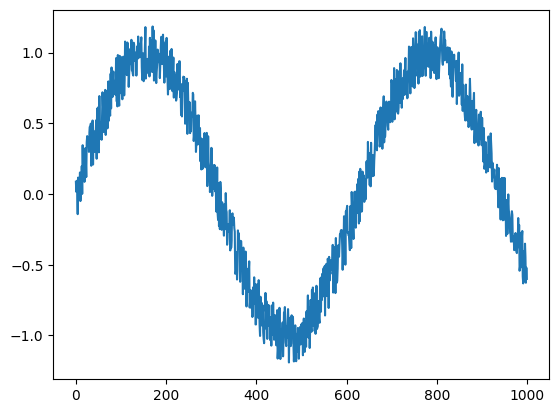

In [4]:
def training_data(n_samples):
    x =  list(range(n_samples))
    y = [math.sin(0.01 * t) + random.uniform(-1, 1) * 0.2 for t in x] 
    return x, y
x, y = training_data(1000)
plt.plot(x,y);

In [5]:
block_sz = 5
batch_sz = 7

listing = [[i+(j*block_sz) for i in range(block_sz)] for j in range(1000//5)]
random.shuffle(listing)
listing[:3]

[[430, 431, 432, 433, 434], [975, 976, 977, 978, 979], [90, 91, 92, 93, 94]]

In [21]:
iter_list = iter(listing)
def DataLoader():
    n_list = next(iter_list)
    x_data, y_data = [x[i] for i in n_list], [ y[i] for i in n_list]
    return x_data, y_data

In [7]:
class Rnn:
    def __init__(self, n_inpt, n_out):
        self.hidden = (0 for _ in range(5))
        self.W_io = NLP(5, [5, 5]) 
        self.W_hh = NLP(5, [5,5])
        self.W_ho = NLP(5, [1])
        
        
    def __call__(self, inpt):
        self.hidden = self.hidden+self.W_io(inpt) #1,3 3,5 -> 1,5 + 1,5 -> 1,5
        
        return out 

        

In [419]:
W_ih = NLP(1, [5]) 
W_hh = NLP(5, [5,5])
W_ho = NLP(5, [1])


In [23]:
bias = random.uniform(-1,1)
hidden = [Value(random.unform(-1, 1) for _ range(5)]
for i in range(10):
    t_data, t_label = DataLoader()
    loss = 0
    preds = []

    a = w_ih(t_data)
    b = w_hh(hidden)

    o = [a[i] + b[i] for i in len(a)]
    
    
    inpt = w_ih(t_data)
    hidden = w_hh(hidden)
    out = w_ih(hidden)
    

    
    out = w_ho(hidden)
    
    for data in t_data:
        hidden =  W_hh(hidden) + W_ih(data) + bias 
        
        
        
    

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2390019132.py, line 2)

In [143]:
t_time, t_value = DataLoader()
t_value

[1.144241929077933,
 0.9220937239864431,
 1.1590883803726222,
 0.8307278645132739,
 0.8432944451554613]

In [423]:
plt_loss=[]

In [ ]:
for i in range(20):
    hidden = [Value(random.uniform(-1, 1)) for _ in range(5)]
    t_loss = 0
    
    all_parameters = W_ih.parameters() + W_hh.parameters() + W_ho.parameters()
    for p in all_parameters:
        p.data = p.data - (0.001 * p.grad)
        
    for data_i in range(len(t_value)-1):
        mix_iw = W_ih([t_value[data_i]])
        mix_hh = W_hh(hidden)
        hidden = [mix_iw[i] + mix_hh[i] for i in range(len(mix_iw))]
        out = W_ho(hidden)
    
        loss = (out - t_value[data_i+1])**2.0
        t_loss += loss
        
    t_loss.backward()
    plt_loss.append(t_loss)

    all_parameters = W_ih.parameters() + W_hh.parameters() + W_ho.parameters()
    for p in all_parameters:
        p.data = p.data - (0.001 * p.grad)


In [424]:
class Model: 
    def __init__(self):
        self.W_ih = NLP(1, [5]) 
        self.W_hh = NLP(5, [5,5])
        self.W_ho = NLP(5, [1])
        
    def forward():
        self.hidden = [Value(random.uniform(-1, 1)) for _ in range(5)]
        self.label, self.data = DataLoader()
        

    for i in range(20):
        hidden =
        self.t_loss = 0
        # all_parameters = W_ih.parameters() + W_hh.parameters() + W_ho.parameters()
        # for p in all_parameters:
        #     p.data = p.data - (0.001 * p.grad)
            
        for data_i in range(len(t_value)-1):
            mix_iw = W_ih([t_value[data_i]])
            mix_hh = W_hh(hidden)
            hidden = [mix_iw[i] + mix_hh[i] for i in range(len(mix_iw))]
            out = W_ho(hidden)
        
            loss = (out - t_value[data_i+1])**2.0
            t_loss += loss
            
        t_loss.backward()
        plt_loss.append(t_loss)
    
        all_parameters = W_ih.parameters() + W_hh.parameters() + W_ho.parameters()
        for p in all_parameters:
            p.data = p.data - (0.001 * p.grad)

    def zero_grad(self):
        all_parameters = self.W_ih.parameters() + self.W_hh.parameters() + self.W_ho.parameters()
        for p in all_parameters:
                p.grad = 0 

    def grad_calculate(self):
        self.loss.backward()
        
    def update_grad(self):
        all_parameters = self.W_ih.parameters() + self.W_hh.parameters() + self.W_ho.parameters()
        for p in all_parameters:
            p.data = p.data - (0.001 * p.grad)
            
        
    
    
        

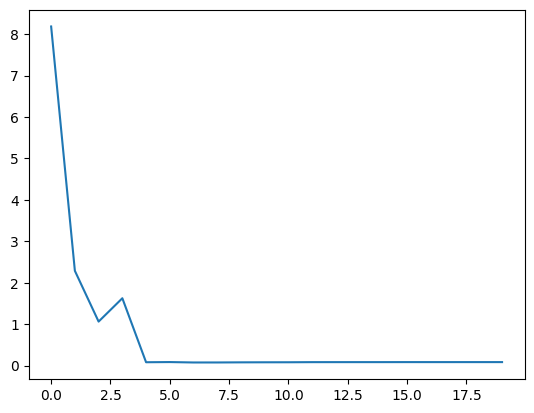

In [431]:
plt.plot(time, [data.data for data in plt_loss])

In [432]:
t_value

[1.144241929077933,
 0.9220937239864431,
 1.1590883803726222,
 0.8307278645132739,
 0.8432944451554613]

In [434]:
t_time

[760, 761, 762, 763, 764]

In [435]:
t_label, t_data = DataLoader()


([340, 341, 342, 343, 344],
 [-0.25744144367547156,
  -0.11440806718203506,
  -0.39838518803255163,
  -0.16868865637484998,
  -0.3800909226957617])

In [ ]:
math.sin